In [11]:
import pandas as pd

# Load the uploaded files
task_categories_df = pd.read_excel('Task Categories.xlsx')
task_ratings_df = pd.read_excel('Task Ratings.xlsx')
task_statements_df = pd.read_excel('Task Statements.xlsx')
tasks_to_dwas_df = pd.read_excel('Tasks to DWAs.xlsx')

# Display the first few rows of each dataframe to understand their structure
task_categories_df.head(), task_ratings_df.head(), task_statements_df.head(), tasks_to_dwas_df.head()

(  Scale ID                          Scale Name  Category Category Description
 0       FT  Frequency of Task (Categories 1-7)         1       Yearly or less
 1       FT  Frequency of Task (Categories 1-7)         2     More than yearly
 2       FT  Frequency of Task (Categories 1-7)         3    More than monthly
 3       FT  Frequency of Task (Categories 1-7)         4     More than weekly
 4       FT  Frequency of Task (Categories 1-7)         5                Daily,
   O*NET-SOC Code             Title  Task ID  \
 0     11-1011.00  Chief Executives     8823   
 1     11-1011.00  Chief Executives     8823   
 2     11-1011.00  Chief Executives     8823   
 3     11-1011.00  Chief Executives     8823   
 4     11-1011.00  Chief Executives     8823   
 
                                                 Task Scale ID  \
 0  Direct or coordinate an organization's financi...       FT   
 1  Direct or coordinate an organization's financi...       FT   
 2  Direct or coordinate an organizat

In [12]:
# Define routine keywords for identifying repetitive tasks
routine_keywords = ['process', 'enter', 'maintain', 'record', 'file', 'inspect', 'monitor', 
                    'sort', 'assemble', 'clean', 'prepare', 'package', 'repeat', 'routine', 'predictable']

# Function to identify if a task is routine
def is_routine(task_description):
    task_description = task_description.lower()
    for keyword in routine_keywords:
        if keyword in task_description:
            return True
    return False

# Step 1: Apply the 'is_routine' function to classify tasks as routine or non-routine in the Task Statements
task_statements_df['Routine'] = task_statements_df['Task'].apply(is_routine)

# Step 2: Calculate the percentage of routine tasks per occupation
routine_tasks_by_occupation = task_statements_df.groupby('O*NET-SOC Code')['Routine'].mean().reset_index()

# Step 3: Label occupations as "Repetitive" or "Non-Repetitive" based on the percentage of routine tasks
# (If more than 50% of tasks in an occupation are routine, we label it as "Repetitive")
routine_tasks_by_occupation['Repetitive_Label'] = routine_tasks_by_occupation['Routine'].apply(lambda x: 'Repetitive' if x > 0.5 else 'Non-Repetitive')

# Step 4: Merge with the occupation data from the Task Ratings file for occupation names
final_occupation_labels = pd.merge(task_ratings_df[['O*NET-SOC Code', 'Title']].drop_duplicates(), routine_tasks_by_occupation, on='O*NET-SOC Code', how='left')

# Step 5: Save the final dataset to a CSV file
final_occupation_labels.to_csv('occupation_repetitive_labels.csv', index=False)

# Display the final dataset
final_occupation_labels.head()


PermissionError: [Errno 13] Permission denied: 'occupation_repetitive_labels.csv'

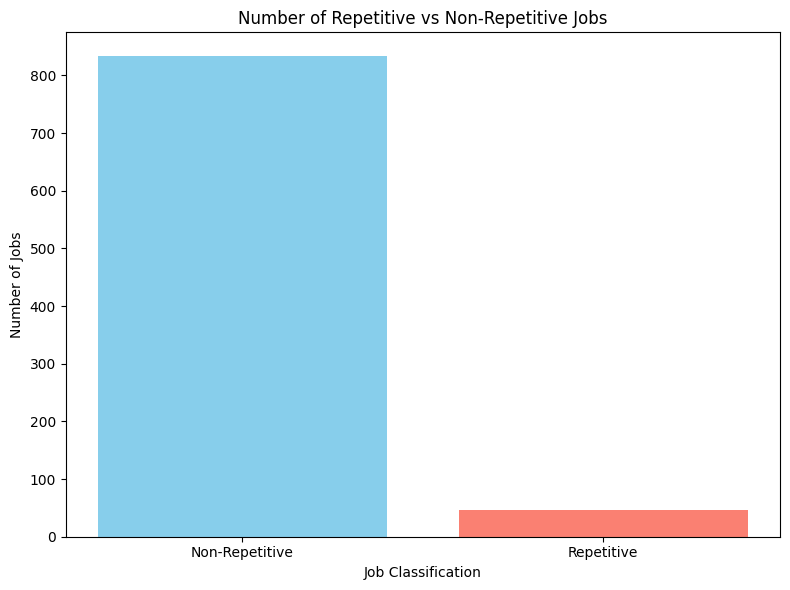

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the final dataset (replace with your file path if necessary)
final_occupation_labels = pd.read_csv('occupation_repetitive_labels.csv')

# Count the number of Repetitive vs Non-Repetitive jobs
repetitive_counts = final_occupation_labels['Repetitive_Label'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(repetitive_counts.index, repetitive_counts.values, color=['skyblue', 'salmon'])
plt.title('Number of Repetitive vs Non-Repetitive Jobs')
plt.xlabel('Job Classification')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
# Adding a column to highlight the repetitive tasks in the task_statements_df
task_statements_df['Repetitive_Task'] = task_statements_df['Task'].apply(
    lambda x: 'Repetitive' if is_routine(x) else 'Non-Repetitive'
)

# Step 1: Apply the 'is_routine' function to classify tasks as routine or non-routine in the Task Statements
task_statements_df['Routine'] = task_statements_df['Task'].apply(is_routine)

# Step 2: Calculate the percentage of routine tasks per occupation
routine_tasks_by_occupation = task_statements_df.groupby('O*NET-SOC Code')['Routine'].mean().reset_index()

# Step 3: Label occupations as "Repetitive" or "Non-Repetitive" based on the percentage of routine tasks
routine_tasks_by_occupation['Repetitive_Label'] = routine_tasks_by_occupation['Routine'].apply(lambda x: 'Repetitive' if x > 0.5 else 'Non-Repetitive')

# Step 4: Merge with the occupation data from the Task Ratings file for occupation names
final_occupation_labels = pd.merge(task_ratings_df[['O*NET-SOC Code', 'Title']].drop_duplicates(), 
                                   routine_tasks_by_occupation, 
                                   on='O*NET-SOC Code', 
                                   how='left')

# Step 5: Merge with task statements to include repetitive tasks information
final_occupation_labels_with_tasks = pd.merge(final_occupation_labels, task_statements_df[['O*NET-SOC Code', 'Task', 'Repetitive_Task']], on='O*NET-SOC Code', how='left')

# Step 6: Save the final dataset with repetitive tasks highlighted
final_occupation_labels_with_tasks.to_csv('occupation_repetitive_labels_with_tasks.csv', index=False)

# Display the first few rows of the final dataset
final_occupation_labels_with_tasks.head()


,O*NET-SOC Code,Title,Routine,Repetitive_Label,Task,Repetitive_Task
0,11-1011.00,Chief Executives,0.129032,Non-Repetitive,Direct or coordinate an organization's financi...,Non-Repetitive
1,11-1011.00,Chief Executives,0.129032,Non-Repetitive,"Confer with board members, organization offici...",Non-Repetitive
2,11-1011.00,Chief Executives,0.129032,Non-Repetitive,"Prepare budgets for approval, including those ...",Repetitive
3,11-1011.00,Chief Executives,0.129032,Non-Repetitive,"Direct, plan, or implement policies, objective...",Non-Repetitive
4,11-1011.00,Chief Executives,0.129032,Non-Repetitive,Prepare or present reports concerning activiti...,Repetitive


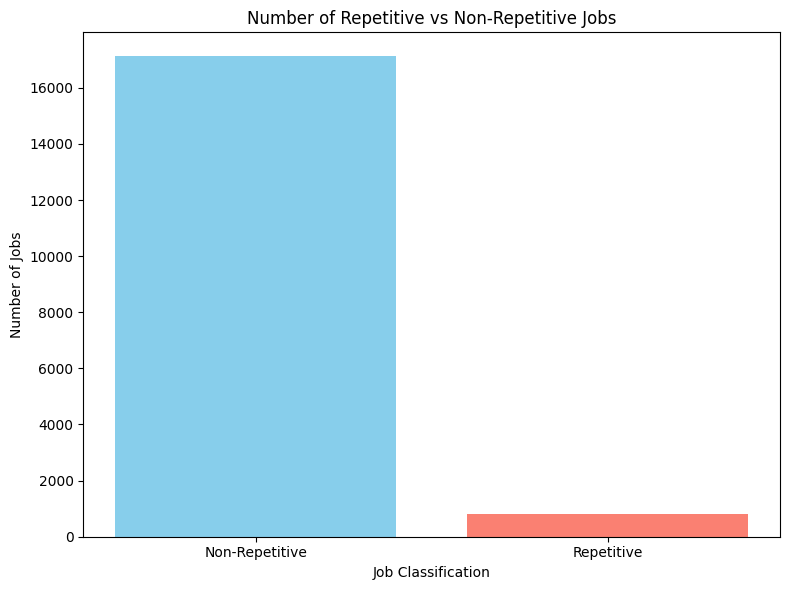

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the final dataset (replace with your file path if necessary)
final_occupation_labels = pd.read_csv('occupation_repetitive_labels_with_tasks.csv')

# Count the number of Repetitive vs Non-Repetitive jobs
repetitive_counts = final_occupation_labels['Repetitive_Label'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(repetitive_counts.index, repetitive_counts.values, color=['skyblue', 'salmon'])
plt.title('Number of Repetitive vs Non-Repetitive Jobs')
plt.xlabel('Job Classification')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the task statements file (direct O*NET data)
task_statements_df = pd.read_excel('Task Statements.xlsx')

# Define routine keywords for identifying repetitive tasks
routine_keywords = ['process', 'enter', 'maintain', 'record', 'file', 'inspect', 'monitor', 
                    'sort', 'assemble', 'clean', 'prepare', 'package', 'repeat', 'routine', 'predictable']

# Function to label tasks as repetitive or non-repetitive based on keywords
def is_routine(task_description):
    task_description = task_description.lower()
    for keyword in routine_keywords:
        if keyword in task_description:
            return 'Repetitive'
    return 'Non-Repetitive'

# Apply the function to the Task column to label each task
task_statements_df['Repetitive_Label'] = task_statements_df['Task'].apply(is_routine)

# Prepare the data for model training
X = task_statements_df['Task']  # Task descriptions (features)
y = task_statements_df['Repetitive_Label']  # Labels (Repetitive or Non-Repetitive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text to numerical data using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model and vectorizer for future use
import pickle
with open('task_classification_model_basic.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('tfidf_vectorizer_basic.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)


Accuracy: 0.9537234042553191
Classification Report:
                 precision    recall  f1-score   support

Non-Repetitive       0.94      1.00      0.97      2740
    Repetitive       1.00      0.83      0.91      1020

      accuracy                           0.95      3760
     macro avg       0.97      0.91      0.94      3760
  weighted avg       0.96      0.95      0.95      3760



In [16]:
# Step 2: Load the original task data
task_statements_df = pd.read_excel('Task Statements.xlsx')

# Step 3: Prepare the task descriptions for prediction
X = task_statements_df['Task']  # Task descriptions

# Step 4: Convert the task descriptions to TF-IDF vectors
X_tfidf = tfidf_vectorizer.transform(X)

# Step 5: Use the model to predict whether each task is repetitive
task_statements_df['Repetitive_Predicted'] = model.predict(X_tfidf)

# Step 6: Convert "Repetitive_Predicted" to binary values (1 for repetitive, 0 for non-repetitive)
task_statements_df['Repetitive_Binary'] = task_statements_df['Repetitive_Predicted'].apply(lambda x: 1 if x == 'Repetitive' else 0)

# Step 7: Calculate the percentage of repetitive tasks for each job title
percentage_repetitive = task_statements_df.groupby('O*NET-SOC Code').agg(
    Job_Title=('Title', 'first'),
    Repetitive_Percentage=('Repetitive_Binary', 'mean')
).reset_index()

# Step 8: Convert the Repetitive_Percentage to percentages
percentage_repetitive['Repetitive_Percentage'] = percentage_repetitive['Repetitive_Percentage'] * 100

# Step 9: Save the result to an Excel file
percentage_repetitive.to_excel('job_repetitiveness_percentage.xlsx', index=False)

# Display the first few rows of the final dataset
percentage_repetitive.head()

,O*NET-SOC Code,Job_Title,Repetitive_Percentage
0,11-1011.00,Chief Executives,12.903226
1,11-1011.03,Chief Sustainability Officers,16.666667
2,11-1021.00,General and Operations Managers,11.764706
3,11-1031.00,Legislators,13.333333
4,11-2011.00,Advertising and Promotions Managers,23.333333


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
percentage_repetitive = pd.read_excel('job_repetitiveness_percentage.xlsx')

# Step 2: Define bins for the percentage ranges (0-10%, 10-20%, etc.)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Step 3: Create a new column 'Repetitive_Percentage_Bin' to categorize jobs into percentage ranges
percentage_repetitive['Repetitive_Percentage_Bin'] = pd.cut(percentage_repetitive['Repetitive_Percentage'], bins=bins, labels=labels)

# Step 4: Count the number of jobs in each percentage range
job_counts = percentage_repetitive['Repetitive_Percentage_Bin'].value_counts(sort=False)

# Step 5: Plot the bar graph
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Jobs by Percentage of Repetitiveness')
plt.xlabel('Repetitive Percentage Range')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
